# Convolutional Neural Networks

## Machine learning on images

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

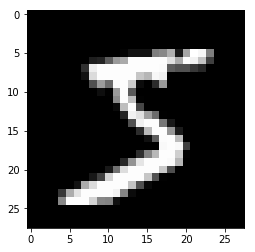

In [9]:
plt.imshow(X_train[0], cmap='gray')

In [10]:
# flatten the vectors
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
# Min max scaler as float 32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [13]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
y_train[0]

5

In [17]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [18]:
y_train_cat.shape

(60000, 10)

In [19]:
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [21]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s - loss: 0.3271 - acc: 0.8993 - val_loss: 0.2503 - val_acc: 0.9233
Epoch 2/10
42000/42000 [==============================] - 3s - loss: 0.1113 - acc: 0.9661 - val_loss: 0.1619 - val_acc: 0.9529
Epoch 3/10
42000/42000 [==============================] - 3s - loss: 0.0711 - acc: 0.9786 - val_loss: 0.1025 - val_acc: 0.9709
Epoch 4/10
42000/42000 [==============================] - 3s - loss: 0.0525 - acc: 0.9840 - val_loss: 0.1076 - val_acc: 0.9701
Epoch 5/10
42000/42000 [==============================] - 3s - loss: 0.0398 - acc: 0.9877 - val_loss: 0.0959 - val_acc: 0.9754
Epoch 6/10
42000/42000 [==============================] - 3s - loss: 0.0299 - acc: 0.9906 - val_loss: 0.1230 - val_acc: 0.9707
Epoch 7/10
42000/42000 [==============================] - 3s - loss: 0.0256 - acc: 0.9924 - val_loss: 0.1069 - val_acc: 0.9766
Epoch 8/10
42000/42000 [==============================] - 3s 

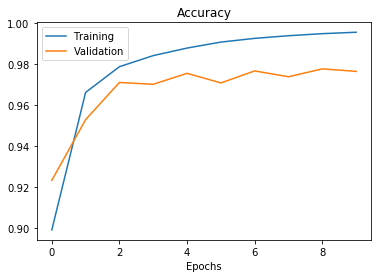

In [22]:
# overfitted
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [23]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

 9536/10000 [===========================>..] - ETA: 0s

0.9778

### Tensor Math
* order 0 tensor is a scalar
* order 1 tensor is a vector, one axis
* order 2 tensor is a matrix, two axis
* order 3 and more and just tensors


RGB is an order 3 tensor, channel last is (Height,  Width, Channel)

In [33]:
# 2 blocks of 3 matrices that are 4 by 5
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [34]:
A

array([[[[9, 6, 1, 0, 0],
         [6, 1, 0, 2, 2],
         [0, 8, 6, 2, 4],
         [7, 2, 4, 6, 9]],

        [[3, 2, 4, 5, 2],
         [5, 4, 8, 6, 3],
         [3, 1, 3, 7, 5],
         [8, 1, 3, 4, 9]],

        [[9, 2, 3, 9, 8],
         [7, 8, 2, 0, 0],
         [0, 4, 6, 2, 5],
         [9, 2, 3, 8, 4]]],


       [[[7, 3, 4, 7, 5],
         [1, 0, 5, 7, 7],
         [8, 8, 0, 9, 8],
         [0, 3, 4, 5, 8]],

        [[6, 5, 9, 1, 1],
         [0, 9, 7, 2, 0],
         [2, 0, 1, 3, 7],
         [9, 8, 0, 5, 0]],

        [[1, 9, 0, 0, 5],
         [4, 3, 9, 2, 9],
         [1, 6, 8, 8, 5],
         [9, 2, 1, 2, 1]]]])

In [35]:
A[0, 1, 0, 3]

5

In [36]:
B

array([[8, 9, 4],
       [6, 4, 1]])

#### A random colored image

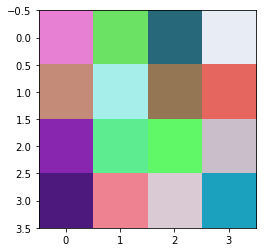

In [37]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
plt.imshow(img)

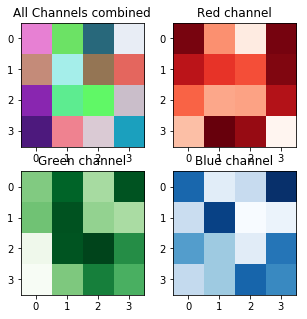

In [38]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

### Tensor operations

In [39]:
2 * A

array([[[[18, 12,  2,  0,  0],
         [12,  2,  0,  4,  4],
         [ 0, 16, 12,  4,  8],
         [14,  4,  8, 12, 18]],

        [[ 6,  4,  8, 10,  4],
         [10,  8, 16, 12,  6],
         [ 6,  2,  6, 14, 10],
         [16,  2,  6,  8, 18]],

        [[18,  4,  6, 18, 16],
         [14, 16,  4,  0,  0],
         [ 0,  8, 12,  4, 10],
         [18,  4,  6, 16,  8]]],


       [[[14,  6,  8, 14, 10],
         [ 2,  0, 10, 14, 14],
         [16, 16,  0, 18, 16],
         [ 0,  6,  8, 10, 16]],

        [[12, 10, 18,  2,  2],
         [ 0, 18, 14,  4,  0],
         [ 4,  0,  2,  6, 14],
         [18, 16,  0, 10,  0]],

        [[ 2, 18,  0,  0, 10],
         [ 8,  6, 18,  4, 18],
         [ 2, 12, 16, 16, 10],
         [18,  4,  2,  4,  2]]]])

In [40]:
A + A

array([[[[18, 12,  2,  0,  0],
         [12,  2,  0,  4,  4],
         [ 0, 16, 12,  4,  8],
         [14,  4,  8, 12, 18]],

        [[ 6,  4,  8, 10,  4],
         [10,  8, 16, 12,  6],
         [ 6,  2,  6, 14, 10],
         [16,  2,  6,  8, 18]],

        [[18,  4,  6, 18, 16],
         [14, 16,  4,  0,  0],
         [ 0,  8, 12,  4, 10],
         [18,  4,  6, 16,  8]]],


       [[[14,  6,  8, 14, 10],
         [ 2,  0, 10, 14, 14],
         [16, 16,  0, 18, 16],
         [ 0,  6,  8, 10, 16]],

        [[12, 10, 18,  2,  2],
         [ 0, 18, 14,  4,  0],
         [ 4,  0,  2,  6, 14],
         [18, 16,  0, 10,  0]],

        [[ 2, 18,  0,  0, 10],
         [ 8,  6, 18,  4, 18],
         [ 2, 12, 16, 16, 10],
         [18,  4,  2,  4,  2]]]])

In [41]:
A.shape

(2, 3, 4, 5)

In [42]:
B.shape

(2, 3)

In [43]:
# dot product only on axis 0 and 1
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[202, 121, 116, 127,  89],
       [131, 115, 147, 122,  94],
       [ 84, 143, 111, 161, 178],
       [209,  85,  96, 168, 218]])

In [47]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

### 1D convolution

In [48]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [49]:
b = np.array([-1, 1], dtype='float32')

In [50]:
c = np.convolve(a, b)

In [51]:
a

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

In [52]:
b

array([-1.,  1.], dtype=float32)

In [53]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

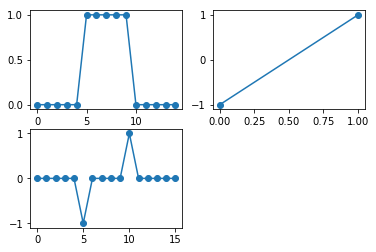

In [60]:
plt.subplot(221)
plt.plot(a, 'o-')

plt.subplot(222)
plt.plot(b, 'o-')

plt.subplot(223)
plt.plot(c, 'o-')

### Image filters with convolutions

In [62]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [63]:
img = misc.ascent()

In [64]:
img.shape

(512, 512)

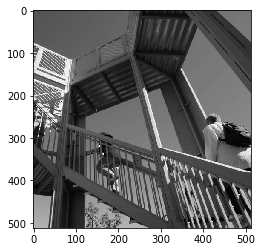

In [69]:
plt.imshow(img, cmap='gray')

In [120]:
h_kernel = np.array([[ -1,  0,  1],
                     [ 0,  1,  0],
                     [1, 0, -1]])


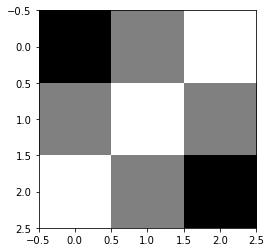

In [121]:
plt.imshow(h_kernel, cmap='gray')

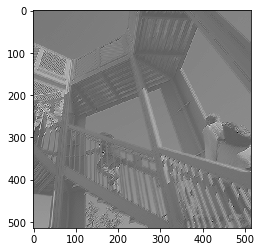

In [122]:
# how were does the image match the convolution patter
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')

## Convolutional neural networks

In [129]:
from keras.layers import Conv2D

In [130]:
img.shape

(512, 512)

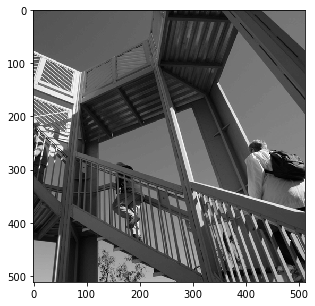

In [131]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [132]:
# reshape into desired format
img_tensor = img.reshape((1, 512, 512, 1))

In [133]:
# simple one layer convolution, but we will not train it
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [134]:
img_pred_tensor = model.predict(img_tensor)

In [135]:
# 2 strides makes x axis same and y axis 2 times smaller
img_pred_tensor.shape

(1, 255, 510, 1)

In [136]:
img_pred = img_pred_tensor[0, :, :, 0]

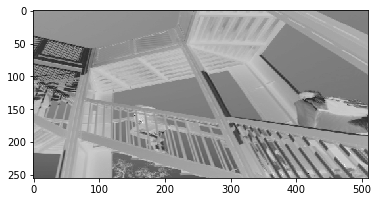

In [137]:
# the kernel is random
plt.imshow(img_pred, cmap='gray')

In [138]:
weights = model.get_weights()

In [139]:
weights[0].shape

(3, 3, 1, 1)

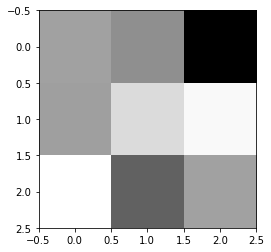

In [140]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [141]:
weights[0] = np.ones(weights[0].shape)

In [142]:
model.set_weights(weights)

In [143]:
img_pred_tensor = model.predict(img_tensor)

In [144]:
img_pred = img_pred_tensor[0, :, :, 0]

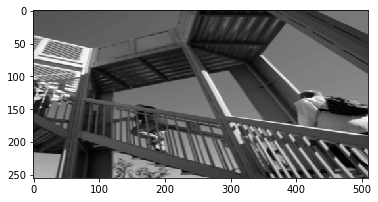

In [146]:
plt.imshow(img_pred, cmap='gray')

In [148]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

# we get exactly same picture
img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers
Pooling preserves location
* max pooling keeps the maximum value of a patch
* average pooling takes the average

In [149]:
from keras.layers import MaxPool2D, AvgPool2D

In [150]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [151]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

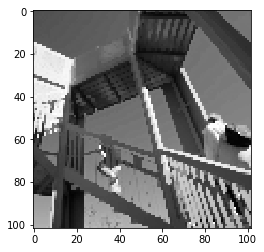

In [152]:
plt.imshow(img_pred, cmap='gray')

In [153]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

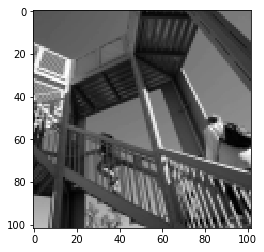

In [154]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

## Final architecture

In [54]:
from keras.models import Sequential

In [55]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [56]:
X_train.shape

(60000, 28, 28, 1)

In [57]:
from keras.layers import Flatten, Activation

In [58]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [59]:
# putting actuvation after pooling makes it two times faster, since we don't have to
# calculate on the larger output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 13s - loss: 0.2825 - acc: 0.9136 - val_loss: 0.1255 - val_acc: 0.9617
Epoch 2/2
42000/42000 [==============================] - 14s - loss: 0.0824 - acc: 0.9757 - val_loss: 0.0892 - val_acc: 0.9734


In [118]:
model.evaluate(X_test, y_test_cat)

 9664/10000 [===========================>..] - ETA: 0s

[0.090854547584801909, 0.97109999999999996]

### Exercise 1
You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

- Start from the network we have just built
- Insert a `Conv2D` layer after the first `MaxPool2D`, give it 64 filters.
- Insert a `MaxPool2D` after that one
- Insert an `Activation` layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import keras.backend as K
from keras.layers import Input, Dense, MaxPool2D, Flatten, Activation, Conv2D
from keras.optimizers import Adam
from keras.models import Model
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [131]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [132]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [133]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [134]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [135]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [136]:
inputs = Input(shape=(28,28,1))

# no need to specify input shape
x = Conv2D(32, (3,3))(inputs)
x = MaxPool2D(pool_size=(2,2))(x)
x = Activation('relu')(x)

x = Conv2D(64, (3,3))(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Activation('relu')(x)

x = Flatten()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
activation_20 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
activation_21 (Activation)   (None, 5, 5, 64)          0         
__________

In [137]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 27s - loss: 0.4419 - acc: 0.8803 - val_loss: 0.2028 - val_acc: 0.9380
Epoch 2/2
42000/42000 [==============================] - 27s - loss: 0.1859 - acc: 0.9424 - val_loss: 0.2234 - val_acc: 0.9400


In [138]:
model.evaluate(X_test, y_test_cat)

 9952/10000 [============================>.] - ETA: 0s

[0.21359135268880056, 0.9385]

### Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of X_train, does it need reshape?
- check the scale of X_train, does it need rescaling?
- check the shape of y_train, does it need reshape?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow (as expected) stop the execution and move to the next session!

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [6]:
len(y_train_cat[0])

10

In [7]:
print(X_train.shape, X_test.shape)
# X_train = X_train.reshape(-1, 32,32, 3)
# X_test = X_test.reshape(-1, 32, 32, 3)
# print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [12]:
K.clear_session()

inputs = Input(shape=(32,32,3))

x = Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [ ]:
model.fit(X_train, y_train_cat, epochs=2, verbose=1, validation_split=0.2, batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
 6656/40000 [===>..........................] - ETA: 127s - loss: 14.2616 - acc: 0.1005